In [43]:
import pandas as pd
from math import ceil

In [10]:
df_index = pd.read_csv('G:/ESA_downloads/index_qa_temp.csv')

In [3]:
df_index.shape

(28891, 41)

### Files with only one row or column 

In [4]:
df_index['qa_single_row_or_col'].sum()

533

There are 533 out of 28891 csv files with only one row or one column. 
An example would be: 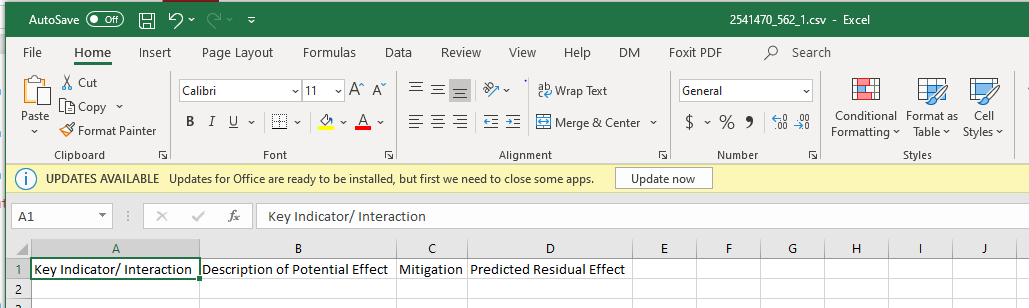

### Files with blank cells (blank cell percentage)

<AxesSubplot:>

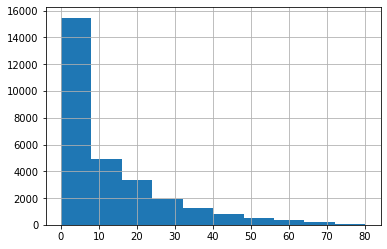

In [7]:
df_index['qa_blank_cell_percent'].hist()

In [8]:
df_index[df_index['qa_blank_cell_percent']>50].shape[0]

997

There are 997 files with over 50% blank cells. 
Percentage is calculated by # of blank cells / (row number * column number).
An example is:
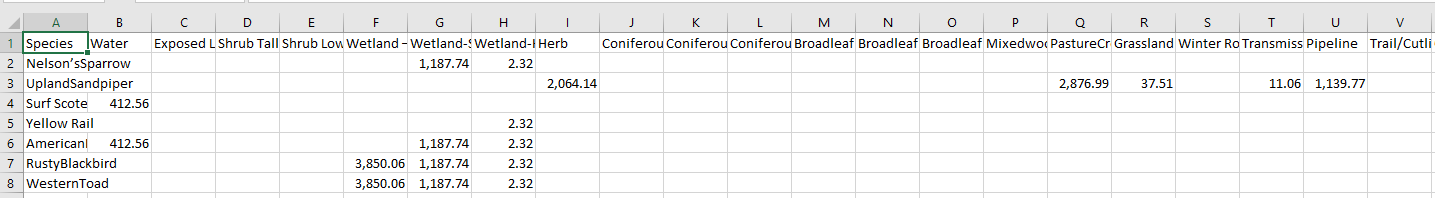

### Files with cid

<AxesSubplot:>

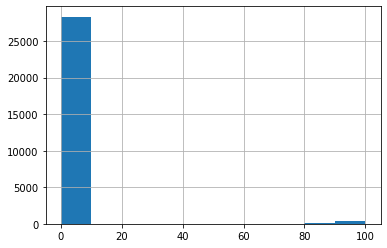

In [11]:
df_index['qa_cid_cell_percent'].hist()

In [15]:
print(df_index[df_index['qa_cid_cell_percent']>0].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>10].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>50].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>80].shape[0])
print(df_index[df_index['qa_cid_cell_percent']>90].shape[0])

642
567
493
429
351


There are 642 files with cid in it. 567 with over 10% cid cells. 493 files with over 50% cid cells.
An example:
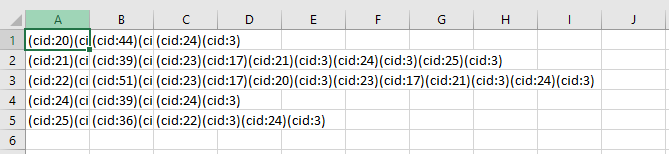

# Metrics Per Project

Use 50% as the threshold for identifying blank csv; use 0% as the threshold for identifying cid csv 

In [22]:
df_index['qa_blank'] = df_index['qa_blank_cell_percent'] > 50
df_index['qa_cid'] = df_index['qa_cid_cell_percent'] > 0

In [39]:
df_project = df_index.groupby('Download folder name')[['qa_single_row_or_col', 'qa_blank', 'qa_cid', 'qa_duplicate']].sum().reset_index()
df_project_count = df_index.groupby('Download folder name')['CSV Download URL'].count().reset_index().rename(columns={'CSV Download URL': 'total_count'})

In [50]:
df_project = df_project.merge(df_project_count)
df_project['single_%'] = df_project[['qa_single_row_or_col', 'total_count']].apply(lambda x: 100*round(x['qa_single_row_or_col']/x['total_count'], 2), axis=1)
df_project['blank_%'] = df_project[['qa_blank', 'total_count']].apply(lambda x: 100*round(x['qa_blank']/x['total_count'], 2), axis=1)
df_project['cid_%'] = df_project[['qa_cid', 'total_count']].apply(lambda x: 100*round(x['qa_cid']/x['total_count'], 2), axis=1)
df_project['duplicate_%'] = df_project[['qa_duplicate', 'total_count']].apply(lambda x: 100*round(x['qa_duplicate']/x['total_count'], 2), axis=1)


In [52]:
df_project.sort_values('total_count')

,Download folder name,qa_single_row_or_col,qa_blank,qa_cid,qa_duplicate,total_count,single_percent,single_%,blank_%,cid_%,duplicate_%
15,lbrsnpplnsstprchs,0,0,0,0,22,0.0,0.0,0.0,0.0,0.0
8,gldbrbndnmnt,0,0,0,0,25,0.0,0.0,0.0,0.0,0.0
19,ln9,0,0,0,0,27,0.0,0.0,0.0,0.0,0.0
6,dppnkbndnmnt,0,1,0,0,58,0.0,0.0,2.0,0.0,0.0
4,cshng,0,2,0,2,73,0.0,0.0,3.0,0.0,3.0
12,kwn,1,0,0,2,96,1.0,1.0,0.0,0.0,2.0
29,sthpc,0,3,0,0,153,0.0,0.0,2.0,0.0,0.0
9,grndbrch,0,1,0,0,162,0.0,0.0,1.0,0.0,0.0
18,ln4,0,2,0,0,178,0.0,0.0,1.0,0.0,0.0
10,hrnrvr,1,1,0,0,242,0.0,0.0,0.0,0.0,0.0


# Metrics Per PDF

In [58]:
df_pdf = df_index.groupby('PDF Download URL')[['qa_single_row_or_col', 'qa_blank', 'qa_cid', 'qa_duplicate']].sum().reset_index()
df_pdf_count = df_index.groupby('PDF Download URL')['CSV Download URL'].count().reset_index().rename(columns={'CSV Download URL': 'total_count'})

In [59]:
df_pdf = df_pdf.merge(df_pdf_count)
df_pdf['single_%'] = df_pdf[['qa_single_row_or_col', 'total_count']].apply(lambda x: 100*round(x['qa_single_row_or_col']/x['total_count'], 2), axis=1)
df_pdf['blank_%'] = df_pdf[['qa_blank', 'total_count']].apply(lambda x: 100*round(x['qa_blank']/x['total_count'], 2), axis=1)
df_pdf['cid_%'] = df_pdf[['qa_cid', 'total_count']].apply(lambda x: 100*round(x['qa_cid']/x['total_count'], 2), axis=1)
df_pdf['duplicate_%'] = df_pdf[['qa_duplicate', 'total_count']].apply(lambda x: 100*round(x['qa_duplicate']/x['total_count'], 2), axis=1)


In [60]:
df_pdf_meta = df_index[['Data ID', 'PDF Download URL', 'Download folder name']].drop_duplicates()
df_pdf = df_pdf.merge(df_pdf_meta, on='PDF Download URL')
df_pdf.sort_values('total_count', ascending=False)

,PDF Download URL,qa_single_row_or_col,qa_blank,qa_cid,qa_duplicate,total_count,single_%,blank_%,cid_%,duplicate_%,Data ID,Download folder name
123,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,153,0,512,329,593,26.0,0.0,86.0,55.0,2541470,strnmnln
569,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,90,15,53,275,379,24.0,4.0,14.0,73.0,408937,brnswck
198,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,132,0,0,379,0.0,35.0,0.0,0.0,2758825,2017ngtl
559,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,341,0.0,0.0,0.0,0.0,3892113,mcknz
181,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,7,0,0,340,0.0,2.0,0.0,0.0,2748827,2017ngtl
...,...,...,...,...,...,...,...,...,...,...,...,...
65,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,1,0.0,0.0,0.0,0.0,2393179,tmx
287,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,1,0.0,0.0,0.0,0.0,2967953,nrgst
289,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,1,0.0,0.0,0.0,0.0,2967956,nrgst
608,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,1,0.0,0.0,0.0,0.0,464806,lbrtclppr


In [62]:
df_pdf.sort_values('cid_%', ascending=False).head(10)

,PDF Download URL,qa_single_row_or_col,qa_blank,qa_cid,qa_duplicate,total_count,single_%,blank_%,cid_%,duplicate_%,Data ID,Download folder name
123,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,153,0,512,329,593,26.0,0.0,86.0,55.0,2541470,strnmnln
563,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,72,0,104,0.0,0.0,69.0,0.0,3892242,mcknz
827,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,2,0,12,0.0,0.0,17.0,0.0,729035,kmnrth
569,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,90,15,53,275,379,24.0,4.0,14.0,73.0,408937,brnswck
75,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,1,0,21,0.0,0.0,5.0,0.0,2393281,tmx
610,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,3,2,0,95,0.0,3.0,2.0,0.0,464815,lbrtclppr
0,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,29,0.0,0.0,0.0,0.0,1059614,nrthmntn
576,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,33,0.0,0.0,0.0,0.0,444757,kystn
570,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,14,0.0,0.0,0.0,0.0,444418,kystn
571,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,0,4,0.0,0.0,0.0,0.0,444424,kystn


In [63]:
df_pdf.sort_values('duplicate_%', ascending=False).head(10)

,PDF Download URL,qa_single_row_or_col,qa_blank,qa_cid,qa_duplicate,total_count,single_%,blank_%,cid_%,duplicate_%,Data ID,Download folder name
569,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,90,15,53,275,379,24.0,4.0,14.0,73.0,408937,brnswck
110,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,113,0,0,198,276,41.0,0.0,0.0,72.0,2445655,wlvrnrvrltrlllp
822,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,49,0,0,114,187,26.0,0.0,0.0,61.0,702747,lsmrkttlrvrcrssvr
763,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,4,7,0.0,0.0,0.0,57.0,667050,vntg
676,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,10,18,0.0,0.0,0.0,56.0,549421,kystnxl
818,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,3,0,0,9,16,19.0,0.0,0.0,56.0,702730,lsmrkttlrvrcrssvr
123,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,153,0,512,329,593,26.0,0.0,86.0,55.0,2541470,strnmnln
113,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,6,0,0,20,39,15.0,0.0,0.0,51.0,2445982,wlvrnrvrltrlllp
817,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,15,0,0,74,147,10.0,0.0,0.0,50.0,702727,lsmrkttlrvrcrssvr
766,https://apps.cer-rec.gc.ca/REGDOCS/File/Downlo...,0,0,0,2,4,0.0,0.0,0.0,50.0,667181,vntg
